## Import Libraries and Load the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/New York City Airbnb.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Inspect and Classify Attribute Types

In [4]:
print(df.head())

# Classify attribute types
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
date_cols = [col for col in df.columns if 'date' in col.lower()]

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print("Date Columns:", date_cols)


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

## Plot Each Attribute and Combinations

# Numerical Attributes

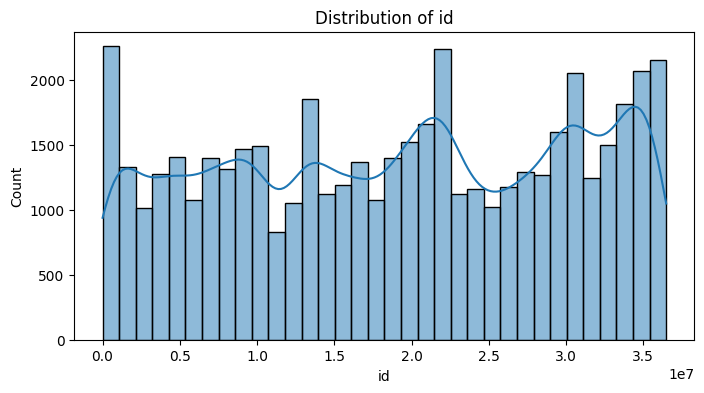

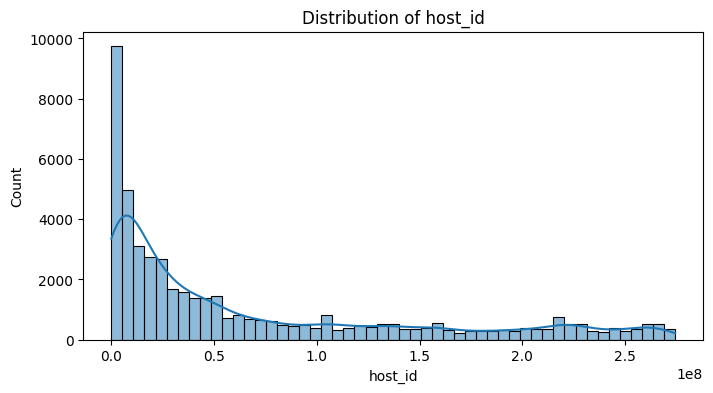

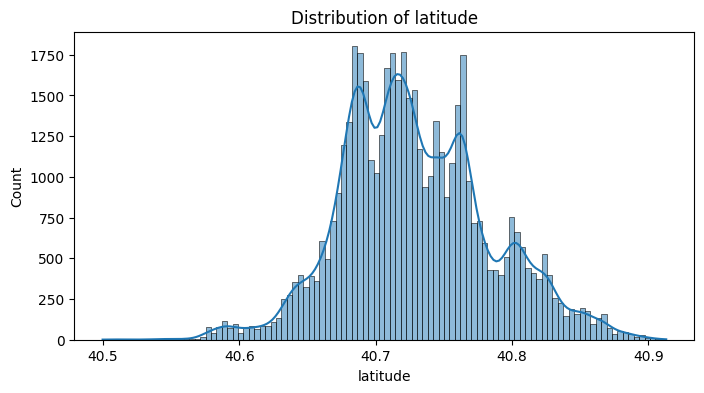

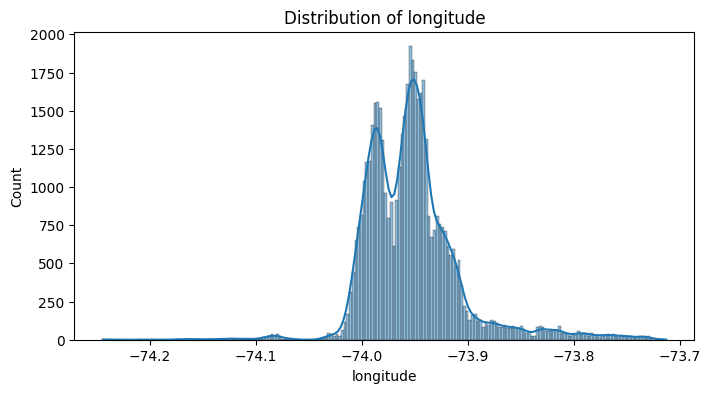

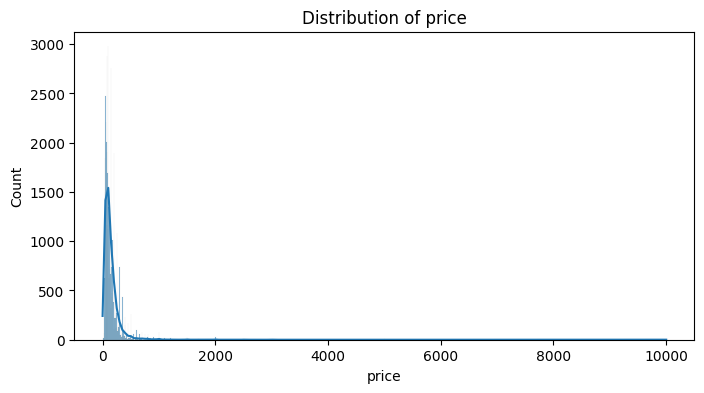

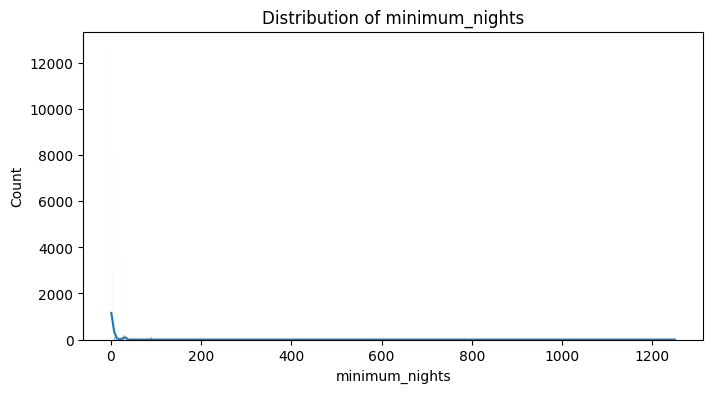

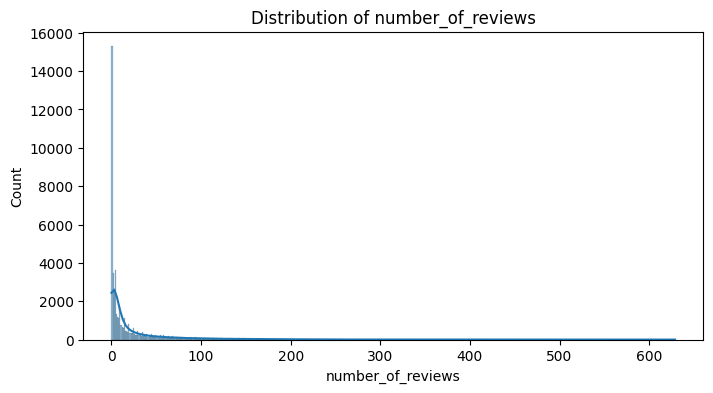

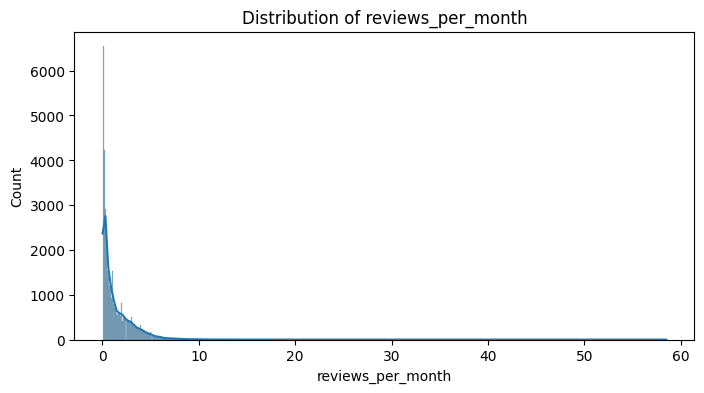

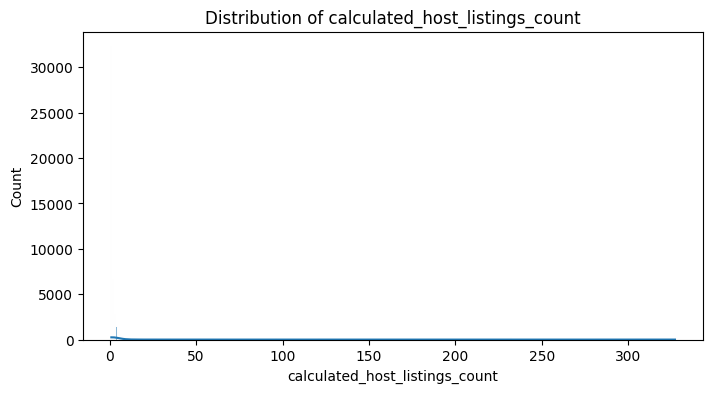

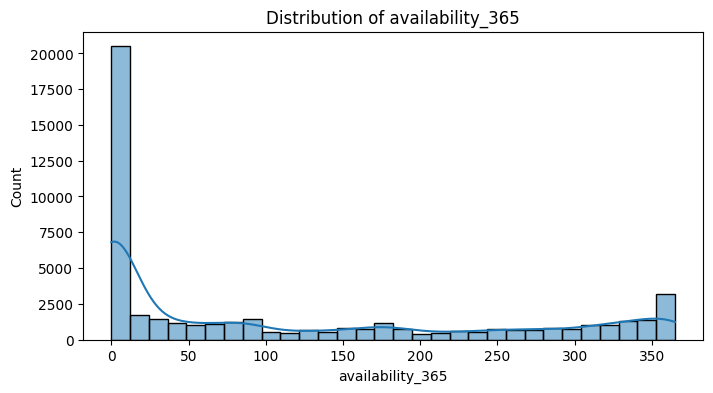

In [5]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


# Categorical Attributes

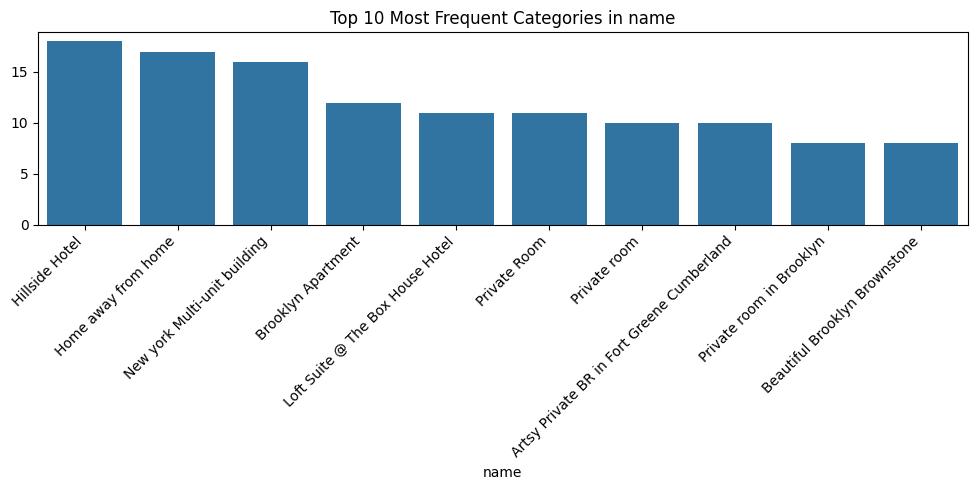

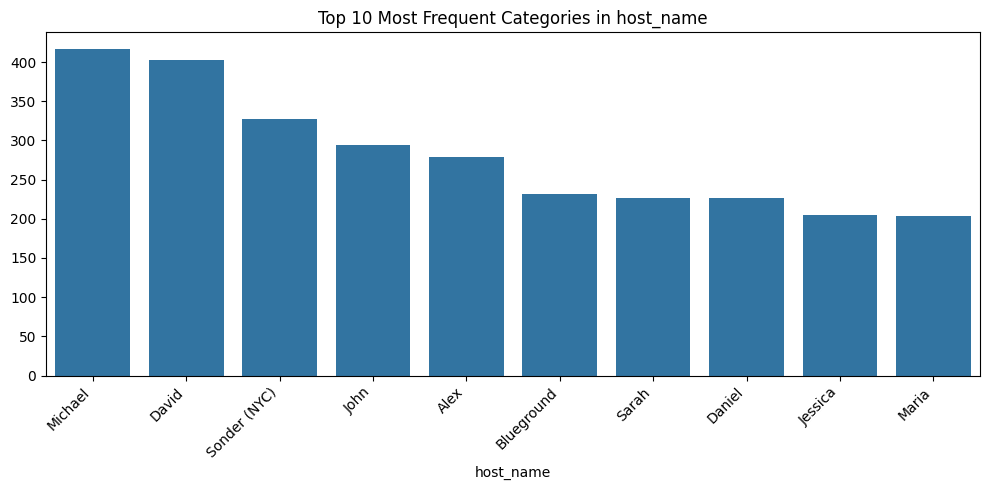

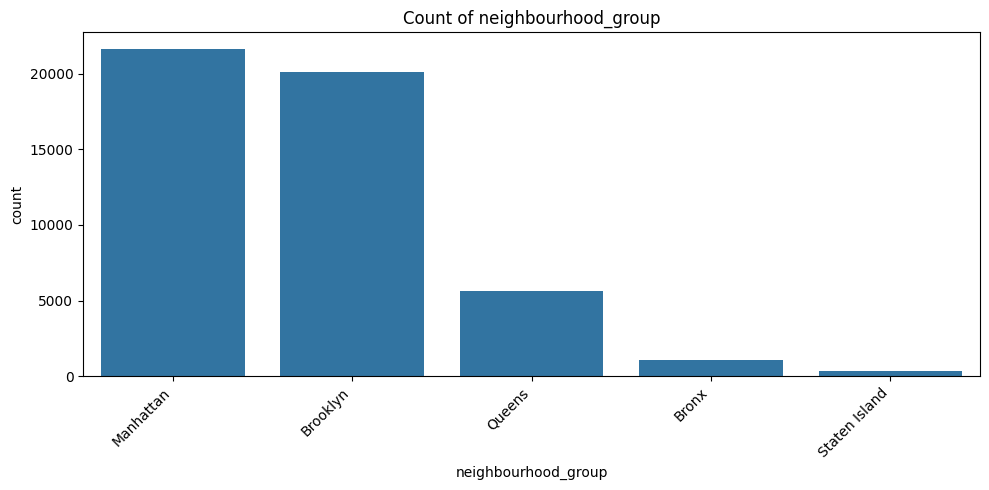

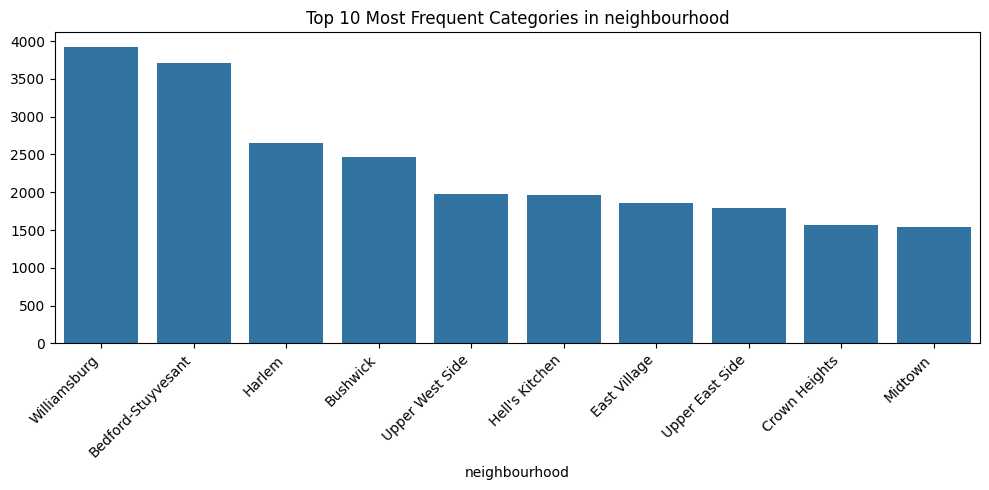

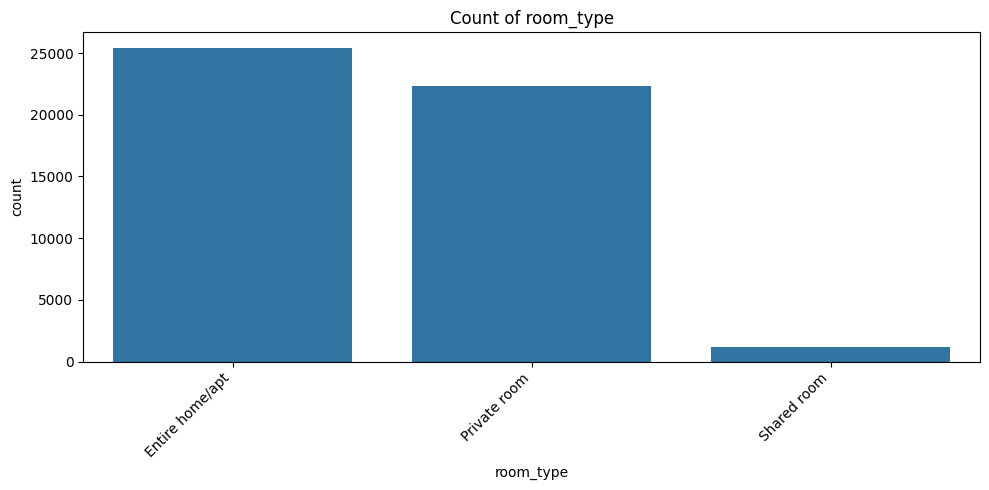

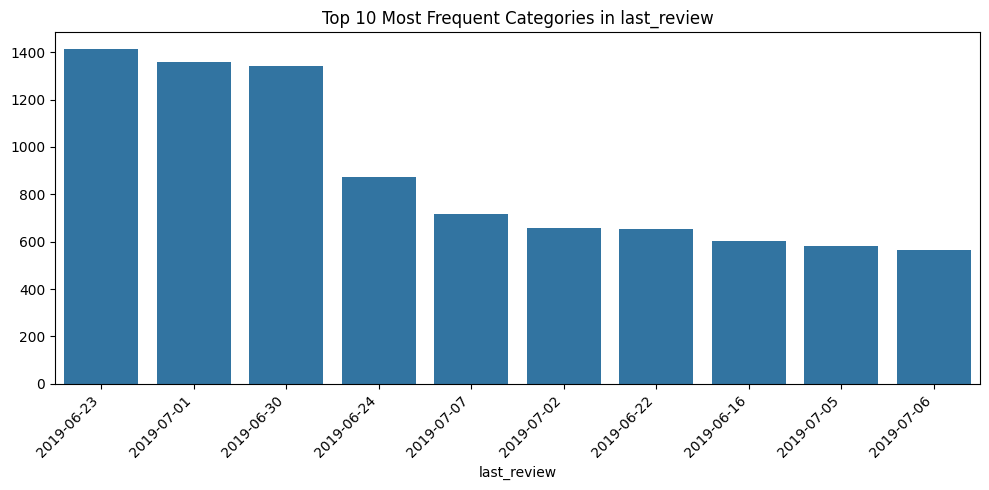

In [6]:
for col in categorical_cols:
    plt.figure(figsize=(10, 5))

    # shown only the top 10
    if df[col].nunique() > 10:
        top_categories = df[col].value_counts().nlargest(10)
        sns.barplot(x=top_categories.index, y=top_categories.values)
        plt.title(f"Top 10 Most Frequent Categories in {col}")
    else:
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.title(f"Count of {col}")

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


## Date-Based Analysis

In [7]:
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # Convert to datetime format
    df[col + '_year'] = df[col].dt.year  # Extract year for easier analysis

    # Plotting year-based distribution
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col + '_year', data=df)
    plt.title(f"Yearly Distribution of {col}")
    plt.show()


## Identify the Target Attribute

## **price** is a common target for prediction in datasets.

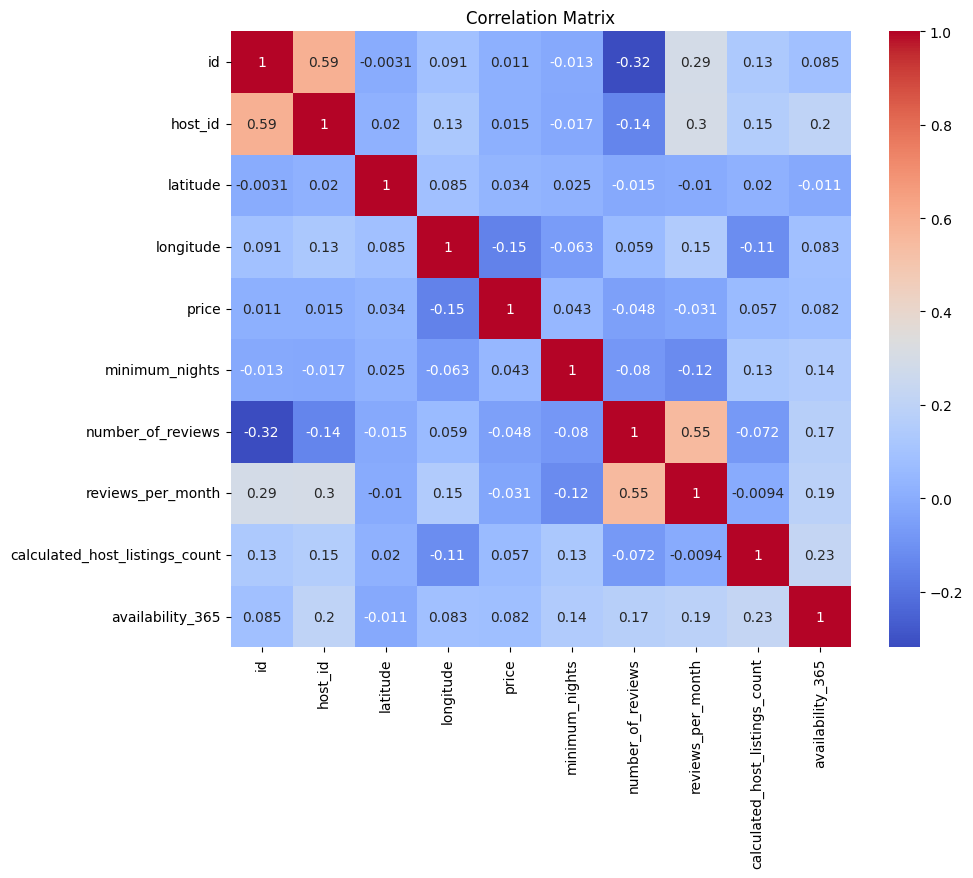

In [8]:
# Compute correlation only for numerical columns
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Filter only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## Machine Learning Model for Prediction

### basic linear regression model using **price** as the target attribute.

## **Target :** Price

## Train the Model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Handle missing values by dropping rows with nulls in essential columns
df = df.dropna(subset=['price', 'latitude', 'longitude', 'reviews_per_month'])

# Select features and target
X = df[['latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', 'minimum_nights']]
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate model performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 36842.27446965033
R² Score: 0.029005113519301684


# **Data Preparation**

## Identify Missing Data

In [10]:
# Check for missing data
missing_data = df.isnull().sum()
print("Missing Data Count:\n", missing_data)

# Visualize missing data
#plt.figure(figsize=(10, 6))
#sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
#plt.title("Missing Data Heatmap")
#plt.show()


Missing Data Count:
 id                                 0
name                               6
host_id                            0
host_name                         16
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64


## Identify Bad Data

In [11]:
# Detect bad data conditions
bad_price = df[df['price'] <= 0]
bad_minimum_nights = df[df['minimum_nights'] > 365]  # Assuming a listing rented for more than a year is unusual
bad_latitude = df[(df['latitude'] < -90) | (df['latitude'] > 90)]
bad_longitude = df[(df['longitude'] < -180) | (df['longitude'] > 180)]
bad_reviews = df[df['reviews_per_month'] < 0]

# Print bad data summaries
print(f"Bad Price Rows: {len(bad_price)}")
print(f"Bad Minimum Nights Rows: {len(bad_minimum_nights)}")
print(f"Bad Latitude Rows: {len(bad_latitude)}")
print(f"Bad Longitude Rows: {len(bad_longitude)}")
print(f"Bad Reviews Rows: {len(bad_reviews)}")


Bad Price Rows: 10
Bad Minimum Nights Rows: 6
Bad Latitude Rows: 0
Bad Longitude Rows: 0
Bad Reviews Rows: 0


## Detect Outliers Using IQR

In [12]:
# Detect outliers using IQR
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']
for col in numerical_cols:
    outliers = detect_outliers(col)
    print(f"Outliers in {col}: {len(outliers)}")


Outliers in price: 2077
Outliers in minimum_nights: 4464
Outliers in number_of_reviews: 4237
Outliers in reviews_per_month: 1793


In [13]:
# Define a function to remove outliers based on the IQR method
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Apply outlier removal to relevant columns
columns_to_check = ['price', 'minimum_nights', 'reviews_per_month']
for col in columns_to_check:
    df = remove_outliers(df, col)

print(f"Dataset after outlier removal: {df.shape}")


Dataset after outlier removal: (31325, 16)


## Visualize Outliers

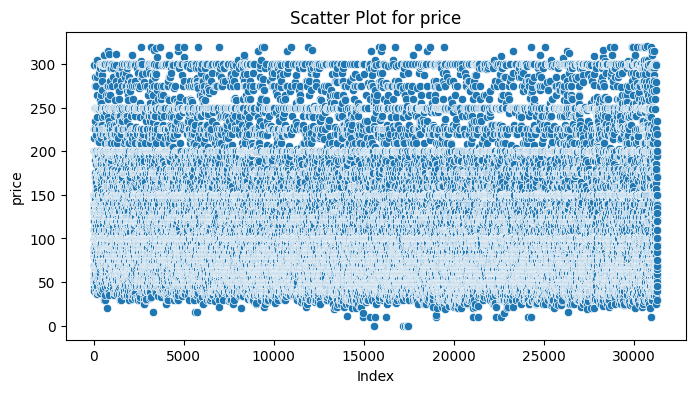

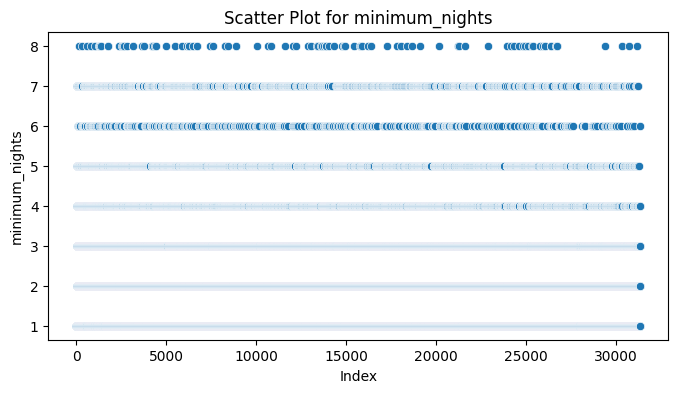

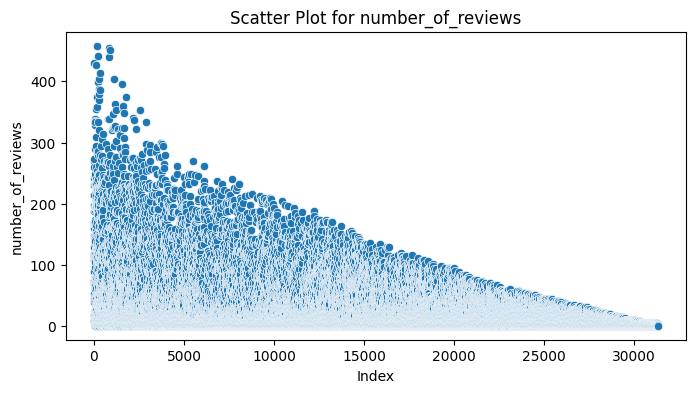

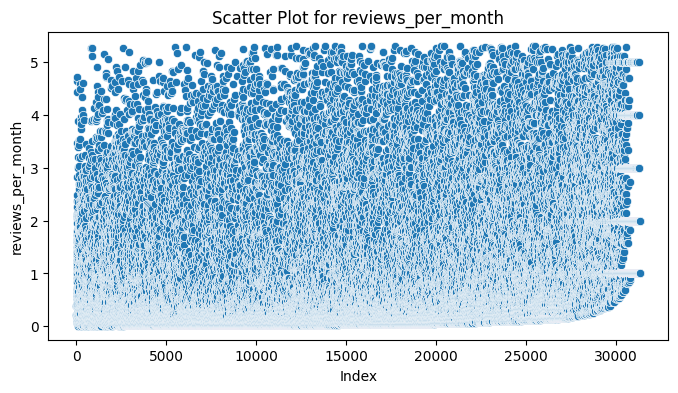

In [14]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=range(len(df[col])), y=df[col])
    plt.title(f"Scatter Plot for {col}")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.show()


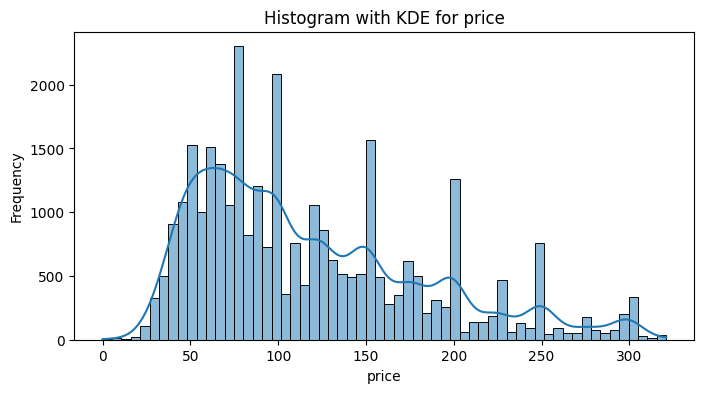

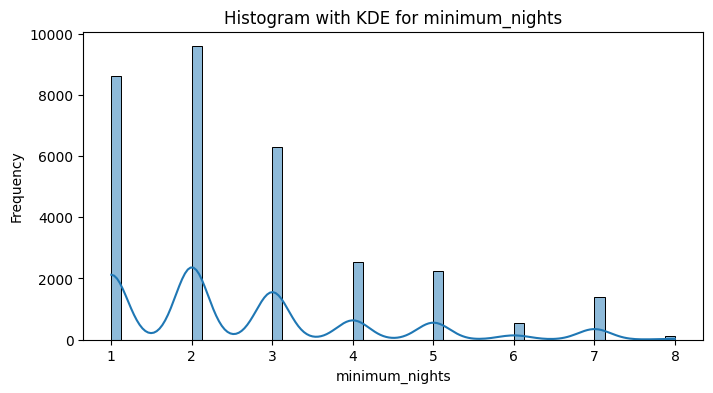

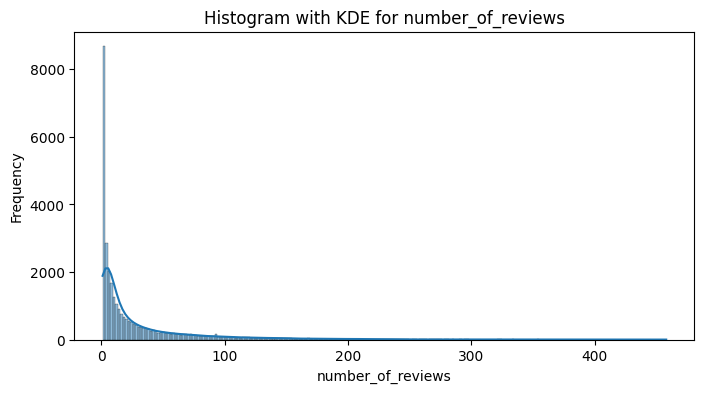

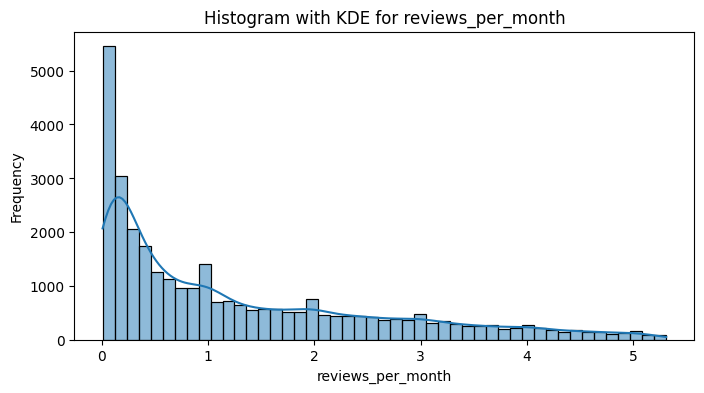

In [15]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram with KDE for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


## Correlation with Target Attribute

In [16]:
target_attribute = 'price'

# Ensure the target attribute exists in the numerical columns
if target_attribute in numerical_cols:
    correlations = df[numerical_cols].corr()[target_attribute].sort_values(ascending=False)
    print("Correlation of Numerical Attributes with Target Attribute:")
    print(correlations)
else:
    print(f"Target attribute '{target_attribute}' is not numerical.")


Correlation of Numerical Attributes with Target Attribute:
price                1.000000
minimum_nights       0.083909
number_of_reviews   -0.001836
reviews_per_month   -0.013899
Name: price, dtype: float64


* Strong correlation with **minimum_nights.**
* Weak correlation with **number_of_reviews.**

## Visualize Correlations

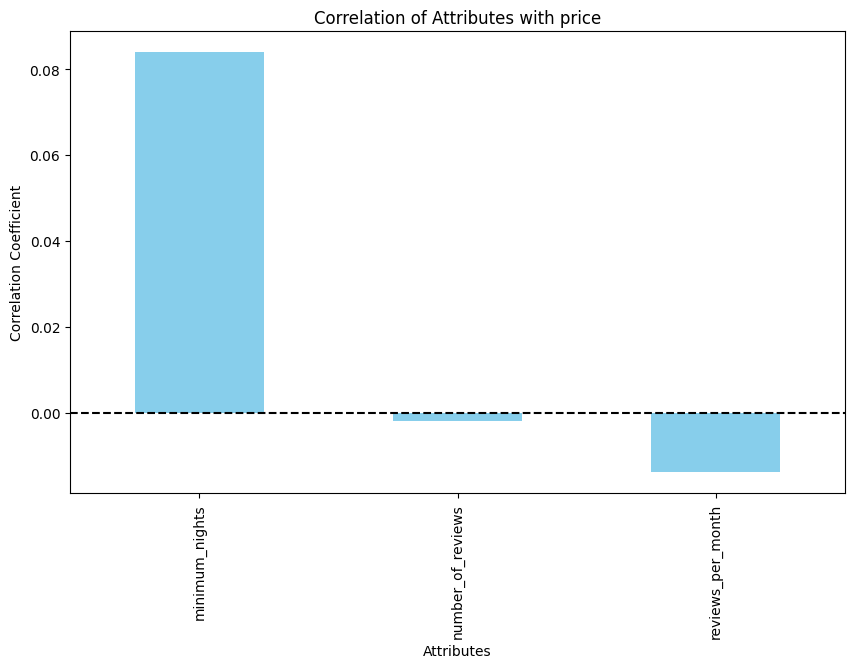

In [17]:
# Plot correlations
plt.figure(figsize=(10, 6))
correlations.drop(target_attribute).plot(kind='bar', color='skyblue')
plt.title(f"Correlation of Attributes with {target_attribute}")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Attributes")
plt.axhline(y=0, color='black', linestyle='--')
plt.show()


## **Identify Redundant Attributes**

## High Correlation Between Attributes

In [37]:
# Compute the correlation matrix for numerical columns
correlation_matrix = df[numerical_cols].corr()

# Identify pairs of highly correlated attributes
high_corr_pairs = []
threshold = 0.50
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

print("Highly Correlated Attribute Pairs:")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]} with correlation {pair[2]:.2f}")


Highly Correlated Attribute Pairs:
host_id and id with correlation 0.59
reviews_per_month and number_of_reviews with correlation 0.55


## Check for Duplicate Columns

In [19]:
# Check for duplicate columns
duplicate_cols = []
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2 and df[col1].equals(df[col2]):
            duplicate_cols.append((col1, col2))

if duplicate_cols:
    print("Duplicate Columns:")
    for col_pair in duplicate_cols:
        print(f"{col_pair[0]} and {col_pair[1]} are identical")
else:
    print("No duplicate columns found.")


No duplicate columns found.


## Low Variance Attributes

In [20]:
# Compute variance for each numerical column
low_variance_cols = df[numerical_cols].var()[df[numerical_cols].var() < 1e-5].index.tolist()

if low_variance_cols:
    print("Low Variance Columns:")
    print(low_variance_cols)
else:
    print("No low variance columns found.")


No low variance columns found.


## Verify the Dataset After Cleanup

In [21]:
print("Remaining Columns:")
print(df.columns)

print("Dataset Overview:")
print(df.info())


Remaining Columns:
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 31325 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              31325 non-null  int64  
 1   name                            31319 non-null  object 
 2   host_id                         31325 non-null  int64  
 3   host_name                       31312 non-null  object 
 4   neighbourhood_group             31325 non-null  object 
 5   neighbourhood                   31325 non-null  object 
 6   latitude                        31325 non-null  float6

## Unpack, Restructure, and Transform Attributes

## Unpack Categorical Variables

## Scale Numerical Attributes

In [23]:
from sklearn.preprocessing import StandardScaler

# Select numerical attributes
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Standardize numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Dataset after Scaling Numerical Attributes:")
print(df.head())


Dataset after Scaling Numerical Attributes:
         id   host_id  latitude  longitude     price  minimum_nights  \
0 -1.707669 -0.842951 -1.411614  -0.486961  0.479156       -1.007203   
1 -1.707663 -0.842950  0.470550  -0.728653  1.646112       -1.007203   
3 -1.707547 -0.842923 -0.743910  -0.219616 -0.442125       -1.007203   
5 -1.707427 -0.842890  0.365029  -0.542720  1.262245        0.239020   
7 -1.707419 -0.842868  0.670418  -0.753246 -0.595672       -0.384091   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0          -0.449628          -0.817283                        0.117069   
1           0.337974          -0.688145                       -0.063832   
3           5.260486           2.547910                       -0.109058   
5           0.972431          -0.528621                       -0.109058   
7           8.760940           1.659135                       -0.109058   

   availability_365  ...  last_review_2019-06-29  last_review_2019-06-30

## Create or Transform Time-Based Attributes

In [24]:
# Extract year, month, and day from 'last_review' (if it exists)
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
    df['review_year'] = df['last_review'].dt.year
    df['review_month'] = df['last_review'].dt.month
    df['review_day'] = df['last_review'].dt.day
    df.drop(columns=['last_review'], inplace=True)  # Drop the original column
    print("Time-based attributes extracted:")
    print(df.head())


## Create New Features (Feature Engineering):
* Transform existing attributes to add meaningful features, such as combining latitude and longitude into a single feature or calculating distance from a central location.

In [25]:
 # Create a 'distance_from_center' feature based on latitude and longitude
from geopy.distance import geodesic
import pandas as pd # Import pandas

# Define a central location (e.g., Times Square, NYC)
center_location = (40.7580, -73.9855)

df = pd.read_csv('/content/New York City Airbnb.csv')

# Calculate distance for each row
df['distance_from_center'] = df.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), center_location).km, axis=1
)
print("New Feature 'distance_from_center' Added:")
print(df[['latitude', 'longitude', 'distance_from_center']].head())

New Feature 'distance_from_center' Added:
   latitude  longitude  distance_from_center
0  40.64749  -73.97237             12.321998
1  40.75362  -73.98377              0.507861
2  40.80902  -73.94190              6.756122
3  40.68514  -73.95976              8.378165
4  40.79851  -73.94399              5.702325


## Handle Skewness in Numerical Attributes

In [26]:
import numpy as np

# Apply log transformation to reduce skewness
skewed_cols = ['price', 'minimum_nights']
for col in skewed_cols:
    df[col] = np.log1p(df[col])  # log1p handles log(0) cases

print("Skewness reduced in selected columns:")
print(df[skewed_cols].head())


Skewness reduced in selected columns:
      price  minimum_nights
0  5.010635        0.693147
1  5.420535        0.693147
2  5.017280        1.386294
3  4.499810        0.693147
4  4.394449        2.397895


In [27]:
# Save the cleaned dataset to a CSV file
df.to_csv('cleaned_airbnb_data.csv', index=False)
print("Cleaned dataset saved as 'cleaned_airbnb_data.csv'.")


Cleaned dataset saved as 'cleaned_airbnb_data.csv'.


## Encode Categorical Variables

In [28]:
# One-hot encode 'neighbourhood_group' and 'room_type'
encoded_df = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)

# Display the encoded DataFrame structure
print("Encoded DataFrame:\n", encoded_df.head())


Encoded DataFrame:
      id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood  latitude  longitude     price  minimum_nights  \
0         John    Kensington  40.64749  -73.97237  5.010635        0.693147   
1     Jennifer       Midtown  40.75362  -73.98377  5.420535        0.693147   
2    Elisabeth        Harlem  40.80902  -73.94190  5.017280        1.386294   
3  LisaRoxanne  Clinton Hill  40.68514  -73.95976  4.499810        0.693147   
4        Laura   East Harlem  40.79851  -73.94399  4.394449        2.397895   

   number_of_reviews  ... reviews_per_month  calculated_host_listings_count  \
0    

## Calculate Correlation with **price**

In [29]:
# Compute correlation for all numerical attributes
correlation_matrix = encoded_df.select_dtypes(include=np.number).corr()

# Extract correlations of encoded attributes with 'price'
correlations_with_price = correlation_matrix['price'].sort_values(ascending=False)
print("Correlations with Target Attribute (Price):\n", correlations_with_price)

Correlations with Target Attribute (Price):
 price                             1.000000
calculated_host_listings_count    0.132274
availability_365                  0.098558
latitude                          0.079339
minimum_nights                    0.063577
id                               -0.015395
host_id                          -0.016690
reviews_per_month                -0.039487
number_of_reviews                -0.042801
longitude                        -0.325043
distance_from_center             -0.386739
Name: price, dtype: float64


## Highest Prices for Top 5 **neighbourhood_group** and **room_type** Combinations

Top 5 Real Prices with Neighbourhood Group and Room Type:
      neighbourhood_group        room_type  real_price
9151               Queens     Private room     10000.0
17692            Brooklyn  Entire home/apt     10000.0
29238           Manhattan  Entire home/apt     10000.0
40433           Manhattan  Entire home/apt      9999.0
12342           Manhattan     Private room      9999.0


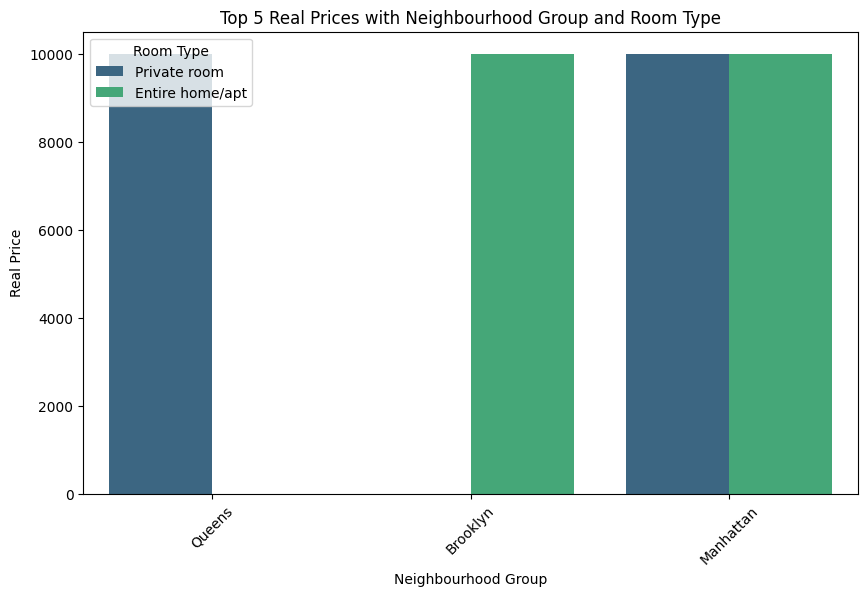

In [30]:
import numpy as np

# Reverse the log transformation on the price column
df['real_price'] = np.expm1(df['price'])

# Sort the dataset by real price in descending order
sorted_df = df.sort_values(by='real_price', ascending=False)

# Select the top 5 records directly from the sorted dataset
top_real_prices = sorted_df[['neighbourhood_group', 'room_type', 'real_price']].head(5)

# Display the result
print("Top 5 Real Prices with Neighbourhood Group and Room Type:")
print(top_real_prices)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='real_price', hue='room_type', data=top_real_prices, palette='viridis')
plt.title("Top 5 Real Prices with Neighbourhood Group and Room Type")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Real Price")
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()
